# Estrategias de Pruebas A/B y Optimización

En esta parte de nuestra clase, exploraremos una demostración práctica que muestra la aplicación de pruebas A/B dentro del sector minorista, impulsado por la IA. Utilizaremos un cuaderno de Python para nuestra demostración, facilitando a los espectadores seguir el proceso y aplicar estas estrategias en sus propios negocios minoristas.

## Pasos que Seguiremos:

1. **Calcular el Efecto Mínimo Detectable (EMD) para Definir el Tamaño de la Muestra**
   - Comenzamos con una población de 1,000,000 de clientes. Nuestro objetivo es determinar el tamaño óptimo de muestra para nuestra prueba A/B. Esto es crucial para asegurar que los resultados de nuestra prueba sean estadísticamente significativos sin desperdiciar recursos.
   - Para lograr esto, realizaremos divisiones aleatorias iterativas de nuestra población (5%, 10%, 15%, ..., hasta el 50%) para prever el Efecto Mínimo Detectable (EMD) en cada nivel. El EMD es el tamaño del efecto más pequeño que nuestra prueba es capaz de detectar, dado nuestro tamaño de muestra.
   - Realizaremos este cálculo 30 veces por división de muestra para asegurarnos de que el valor medio de EMD que obtenemos es una representación fiable de la realidad. Este enfoque iterativo nos ayuda a identificar el tamaño de muestra de "mejor valor" – suficientemente grande para detectar diferencias significativas, pero eficiente en términos de asignación de recursos.

2. **División Aleatoria para Pruebas A/B**
   - Una vez que hemos identificado el tamaño óptimo de la muestra basado en nuestros cálculos de EMD, el siguiente paso es crear nuestros grupos de prueba A/B. Dividiremos aleatoriamente nuestra población en dos grupos: el grupo de control (Grupo A) y el grupo experimental (Grupo B).
   - Esta aleatorización asegura que cada grupo sea similar en todos los aspectos excepto en la variable que estamos probando, que en este caso podría ser cualquier cosa desde un nuevo mensaje de marketing hasta un sistema de recomendación de productos personalizado impulsado por IA.

3. **Realizar una Prueba KS y una Prueba de Equivalencia**
   - Para validar los resultados de nuestras pruebas A/B, emplearemos dos pruebas estadísticas: la prueba de Kolmogorov-Smirnov (KS) y una prueba de equivalencia.
   - **Prueba KS:** Esta prueba no paramétrica nos permite comparar las distribuciones de nuestros dos grupos y determinar si hay una diferencia estadística entre ellos. Es particularmente útil para evaluar el efecto de nuestra variable probada en toda la distribución de comportamientos o resultados de los clientes.
   - **Prueba de Equivalencia:** Mientras que las pruebas tradicionales evalúan si dos grupos son significativamente diferentes, una prueba de equivalencia determina si son estadísticamente similares a un grado especificado. Esto es especialmente valioso cuando nuestro objetivo es demostrar que los cambios realizados en el grupo experimental no afectan negativamente el resultado deseado, asegurando que cualquier nueva estrategia que implementemos sea al menos tan efectiva como las actuales.

Siguiendo estos pasos, no solo entenderemos cómo configurar y analizar efectivamente una prueba A/B, sino también asegurarnos de que nuestro proceso de prueba sea robusto y adaptado para detectar percepciones significativas en el contexto minorista. Esta demostración práctica equipará a los participantes con el conocimiento para aprovechar la IA para optimizar sus estrategias minoristas a través de la toma de decisiones basada en datos.

In [1]:
# Library
import random
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, norm, ks_2samp
from statsmodels.stats.power import TTestIndPower

In [2]:
# Generate a list of 100000 random fake users between 1 and 100000
population = 1000000

# Create the synthetic data for the ab testing example
population_data = [random.randint(1, 100) for _ in range(population)]

# Convert it into 
df = pd.DataFrame({'price':population_data})

In [3]:
df.head()

,price
0,39
1,96
2,66
3,55
4,82


## Comprensión del Cálculo del Efecto Mínimo Detectable (EMD)

En el contexto de las pruebas A/B, especialmente en el comercio minorista o cualquier otro dominio, determinar el Efecto Mínimo Detectable (EMD) es crucial para diseñar experimentos que sean prácticos e informativos. El EMD nos indica el tamaño del efecto más pequeño que nuestra prueba está capacitada para detectar dado un tamaño de muestra específico, un nivel de significancia (\(\alpha\)), y un poder estadístico (\(1 - \beta\)).

### El Proceso Explicado

1. **Inicialización**: Comenzamos con un conjunto de datos y decidimos las fracciones de este conjunto que queremos probar. Estas fracciones varían del 5% al 50% en incrementos del 5%. Para cada fracción, nuestro objetivo es calcular el EMD para entender cómo cambiar el tamaño de nuestra muestra afecta nuestra capacidad para detectar diferencias significativas entre dos grupos (por ejemplo, un grupo de control y un grupo de tratamiento).

2. **Bucle de Simulación**: Para cada fracción:
   - El conjunto de datos se divide en un grupo de prueba y un grupo de control basado en el tamaño actual de la fracción.
   - Realizamos esta división 30 veces para mitigar el efecto de la aleatoriedad y tomar el promedio, asegurando que nuestros cálculos de EMD sean robustos y confiables.

3. **Cálculo del EMD**:
   - Para cada división, calculamos la desviación estándar de los grupos de prueba y control y luego calculamos una desviación estándar agrupada. Esta desviación estándar agrupada ayuda a estimar la desviación estándar común entre los dos grupos como si fueran un solo grupo.
   - El EMD se calcula utilizando la fórmula proporcionada a continuación. Esta fórmula considera el nivel de significancia, el poder deseado de la prueba y la desviación estándar agrupada para calcular el tamaño del efecto más pequeño que la prueba puede detectar de manera confiable.

4. **Visualización**:
   - Después de calcular el EMD para cada fracción, graficamos estos valores contra el tamaño de la muestra. Esta representación visual ayuda a entender la relación entre el tamaño de la muestra y la detectabilidad de los efectos, guiando la planificación de futuras pruebas A/B.

### La Fórmula para el EMD

El EMD se calcula usando la siguiente fórmula:

$$
\text{EMD} = (z_{\alpha/2} + z_{\beta}) \times \text{Desviación Estándar Agrupada} \times \sqrt{\frac{2}{n}}
$$

Donde:
- \(z_{\alpha/2}\) es el valor crítico de la distribución normal estándar para una prueba de dos colas al nivel de significancia \(\alpha\).
- \(z_{\beta}\) es el valor crítico que corresponde al poder deseado (\(1 - \beta\)).
- La desviación estándar agrupada es una estimación de la desviación estándar común de los dos grupos.
- \(n\) es el tamaño de la muestra del grupo de control.

### Puntos Clave

- El EMD es una métrica crucial en la fase de planificación de una prueba A/B. Ayuda a determinar el tamaño de muestra necesario para detectar de manera confiable un efecto de interés.
- Comprender la relación entre el tamaño de la muestra y el EMD puede ayudar a empresas e investigadores a diseñar experimentos más eficientes y efectivos.

Esta explicación y el script de Python acompañante tienen como objetivo desmitificar el proceso de cálculo del EMD, haciéndolo accesible para individuos que planean realizar pruebas A/B en varios dominios.

In [8]:
# Initialize variables
contador = 0  # This will track the fraction of the dataset allocated to the test group
data = {}  # To store results

# Loop to calculate MDE for splits ranging from 5% to 50% of the dataset
while contador <= 0.45:
    contador += 0.05  # Increment the fraction for each iteration
    mde_list = []  # To store MDE values for each iteration
    avg_list = []  # To store average values for the control group
    
    # Perform 30 simulations for each split to average the MDE
    for i in range(1, 31):
        # Randomly split the dataset into test and control groups based on the current fraction
        test_df, control_df = train_test_split(df, test_size=contador)
        
        # Define the parameters for the MDE calculation
        alpha = 0.05  # Significance level
        beta = 0.8    # Desired statistical power
        
        # Calculate standard deviations for both groups
        std_dev_test = np.std(test_df['price'])
        std_dev_control = np.std(control_df['price'])
        
        # Calculate sample sizes
        sample_size_control = len(control_df)
        sample_size_test = len(test_df)
        
        # Calculate critical values for the two-tailed test
        z_alpha = norm.ppf(1 - alpha/2)
        z_beta = norm.ppf(beta)
        
        # Calculate pooled standard deviation
        pooled_std_dev = np.sqrt(((sample_size_control - 1) * std_dev_control**2 + 
                                  (sample_size_test - 1) * std_dev_test**2) / 
                                 (sample_size_control + sample_size_test - 2))
        
        # Calculate the MDE
        mde = (z_alpha + z_beta) * pooled_std_dev * np.sqrt(2 / sample_size_control)
        
        # Append the MDE and average control group price to their respective lists
        mde_list.append(mde)
        avg = np.mean(control_df['price'])
        avg_list.append(avg)
    
    # Calculate and store the average MDE, average price, and MDE percentage for the current split
    data[(round(contador, 2))] = {'mde': round(np.mean(mde_list), 4),
                                  'avg': round(np.mean(avg_list), 4),
                                  'mde_%': round(np.mean(mde_list) / np.mean(avg_list) * 100, 2)}

In [9]:
# Computed value for the sample selected
data

{0.05: {'mde': 0.5116, 'avg': 50.5192, 'mde_%': 1.01},
 0.1: {'mde': 0.3618, 'avg': 50.5285, 'mde_%': 0.72},
 0.15: {'mde': 0.2954, 'avg': 50.5301, 'mde_%': 0.58},
 0.2: {'mde': 0.2558, 'avg': 50.5287, 'mde_%': 0.51},
 0.25: {'mde': 0.2288, 'avg': 50.5092, 'mde_%': 0.45},
 0.3: {'mde': 0.2089, 'avg': 50.5291, 'mde_%': 0.41},
 0.35: {'mde': 0.1934, 'avg': 50.5168, 'mde_%': 0.38},
 0.4: {'mde': 0.1809, 'avg': 50.5244, 'mde_%': 0.36},
 0.45: {'mde': 0.1705, 'avg': 50.5358, 'mde_%': 0.34},
 0.5: {'mde': 0.1618, 'avg': 50.5243, 'mde_%': 0.32}}

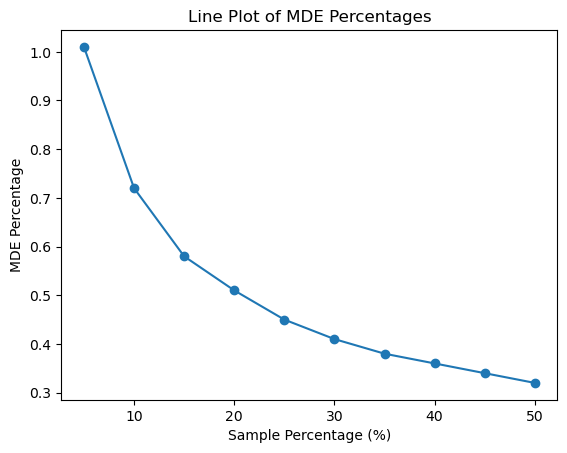

In [10]:
# Prepare data for plotting
percentage_split = [float(key)*100 for key in data.keys()]  # Convert keys to float and multiply by 100 to get percentages
mde_percentage_list_hist = [value['mde_%'] for value in data.values()]  # Extract MDE percentages

# Plotting
plt.plot(percentage_split, mde_percentage_list_hist, marker='o')  # 'o' adds markers to the line plot
plt.title('Line Plot of MDE Percentages')
plt.xlabel('Sample Percentage (%)')  # Updated to display counter percentage of the sample
plt.ylabel('MDE Percentage')

# Show the plot
plt.show()

In [11]:
# We run the split with 30% in test, as per the MDE curve we think it is the most optimal business<>statistical
test_df, control_df = train_test_split(df, test_size=0.3)

In [12]:
test_df

,price
680053,81
48907,23
230788,52
965480,94
942590,79
...,...
716663,19
226993,75
878648,11
23693,11


In [13]:
control_df

,price
93914,36
119931,77
20976,58
223909,85
4918,26
...,...
344588,10
358379,47
767644,38
167358,4


### Realizando la Prueba de Kolmogorov-Smirnov

Después de dividir nuestro conjunto de datos en grupos de control y prueba, nos centramos en comparar sus distribuciones para evaluar si difieren significativamente. Este paso es crucial para validar las suposiciones de nuestro marco de prueba A/B y asegurar la fiabilidad de nuestros resultados.

#### Seleccionando los Datos

Comenzamos seleccionando los datos relevantes de cada grupo. Específicamente, extraemos la columna `price` de los DataFrames de control y prueba. Estas columnas representan la variable de interés para nuestro análisis, como el resultado de una estrategia de marketing, el impacto del precio del producto, o cualquier otra métrica crucial para nuestra prueba A/B.

```python
data1 = control_df['price']  # Extrayendo datos de precios del grupo de control
data2 = test_df['price']  # Extrayendo datos de precios del grupo de prueba
```
**Realizando la Prueba de Kolmogorov-Smirnov (KS)**
Con nuestros datos seleccionados, procedemos a realizar la prueba de Kolmogorov-Smirnov (KS). Esta prueba no paramétrica evalúa la hipótesis de que las distribuciones de dos muestras son iguales. Es particularmente útil en las pruebas A/B para comparar las distribuciones de resultados de nuestros grupos de control y de prueba sin hacer suposiciones sobre la distribución subyacente de los datos.

La prueba KS proporciona dos piezas clave de información:

- La estadística KS: Una medida de la distancia entre las funciones de distribución empíricas de las dos muestras.
- El valor p: Indica la probabilidad de observar los datos asumiendo que la hipótesis nula es cierta. Un valor p bajo (típicamente < 0.05) sugiere que podemos rechazar la hipótesis nula y concluir que las distribuciones de las dos muestras son significativamente diferentes.

```python
statistic, p_value = ks_2samp(data1, data2)
print(f"KS statistic: {statistic}")
print(f"P-value: {p_value}")
```
El resultado de la prueba KS nos ayuda a entender si las intervenciones o cambios que estamos probando tienen un impacto estadísticamente significativo en la distribución de nuestra métrica de interés, permitiéndonos tomar decisiones informadas basadas en los resultados de nuestra prueba A/B.

In [29]:
# Selecting the data from each DataFrame
data1 = control_df['price']  # We select the column price from our df
data2 = test_df['price']  # We select the column price from our df

# Perform the KS test
statistic, p_value = ks_2samp(data1, data2)

print(f"KS statistic: {statistic}")
print(f"P-value: {p_value}")

KS statistic: 0.0032319047619047137
P-value: 0.02482255893982732


En este paso, estamos realizando una prueba de equivalencia entre nuestros grupos de control y prueba para determinar si sus medias son estadísticamente equivalentes dentro de límites predefinidos. La prueba de equivalencia es crucial para situaciones en las que queremos confirmar que dos grupos no difieren por una cantidad significativa, en lugar de simplemente buscar cualquier diferencia.

- **Definiendo los Límites de Equivalencia**: Los límites de equivalencia (`low` y `upp`) definen el rango dentro del cual las medias de los dos grupos deben estar para considerarse equivalentes. En este caso, los límites están establecidos en `-0.5` y `0.5`, lo que significa que estamos probando si la diferencia en las medias es significativamente menor que 0.5 unidades y más que -0.5 unidades en cualquier dirección.

- **Realizando la Prueba de Equivalencia**: Utilizamos el método `ttost_ind` de la biblioteca `statsmodels`, que realiza Dos Pruebas Unilaterales (TOST) para las medias de dos muestras independientes. Este método devuelve tres valores:
  - `pv1`: El valor p de la prueba del límite inferior, que prueba si la diferencia de medias es significativamente mayor que el límite inferior.
  - `pv2`: El valor p de la prueba del límite superior, que prueba si la diferencia de medias es significativamente menor que el límite superior.
  - `result`: Un valor booleano que indica si se cumplen ambas condiciones y, por lo tanto, si las medias son equivalentes dentro de los límites especificados.

- **Interpretando los Resultados**: La salida nos proporciona los valores p para ambas pruebas, inferior y superior. Si ambos valores p están por debajo de un nivel de significancia elegido (comúnmente 0.05), podemos concluir que las medias de los dos grupos son estadísticamente equivalentes dentro de nuestros límites definidos.

Este enfoque permite una comprensión matizada de las diferencias entre los grupos de control y prueba, centrándose en la equivalencia práctica en lugar de solo la diferencia estadística.

In [32]:
# Define the equivalence limits
low, upp = -0.5, 0.5 

# Unpacking the results
p_value_global, result_lower, result_upper = sm.stats.ttost_ind(data1, data2, low, upp)

# Print the results
print(f"Global p-value of TOST: {p_value_global}")
print(f"Inferiority test (difference > lower margin): Statistic = {result_lower[0]}, p-value = {result_lower[1]}")
print(f"Superiority test (difference < upper margin): Statistic = {result_upper[0]}, p-value = {result_upper[1]}")

# Interpretation based on p-values
if p_value_global < 0.05:
    print("There is enough statistical evidence to claim that the two group are equivalent within the specified equivalence margin.")
else:
    print("There is not enough evidence to claim that the two drugs are equivalent.")

Global p-value of TOST: 5.051829902254841e-07
Inferiority test (difference > lower margin): Statistic = 10.981911086911927, p-value = 2.343343078811046e-28
Superiority test (difference < upper margin): Statistic = -4.889639187660524, p-value = 5.051829902254841e-07
There is enough statistical evidence to claim that the two group are equivalent within the specified equivalence margin.


#### Calculando el Efecto Mínimo Detectable (MDE) Temporal

Al diseñar pruebas A/B o cualquier experimento basado en datos, entender el Efecto Mínimo Detectable (MDE) a lo largo del tiempo puede ser crucial. El MDE representa el tamaño del efecto más pequeño que la prueba tiene la capacidad adecuada para identificar. A medida que los datos se acumulan y las distribuciones se estabilizan con el tiempo, el MDE puede disminuir. Esto significa que efectos que no pueden ser detectables con un conjunto de datos más pequeño (por ejemplo, datos semanales) podrían hacerse evidentes al analizar un conjunto de datos más grande recopilado durante un período más largo (por ejemplo, datos mensuales o trimestrales).

**Entendiendo el Enfoque**

En un escenario donde se rastrea el comportamiento del consumidor a lo largo del tiempo, como los hábitos de compra de un producto específico (por ejemplo, detergente), es común no observar cambios significativos en marcos de tiempo cortos como una semana. Sin embargo, durante un mes o más, los patrones de compra pueden emerger más claramente.

Para acomodar este aspecto temporal en nuestro análisis, nuestro conjunto de datos evoluciona para incluir múltiples columnas, cada una representando el promedio acumulativo de consumo sobre períodos de tiempo crecientes. Por ejemplo:
- La Columna 1 podría representar el consumo promedio de enero.
- La Columna 2 podría representar el promedio acumulativo de enero y febrero.
- La Columna 3 incluiría entonces el promedio acumulativo de enero, febrero y marzo, y así sucesivamente.

Esta estructura nos permite observar cómo se estabiliza o cambia el consumo promedio a medida que se acumulan más datos con el tiempo.

**Reaplicando el Cálculo del MDE**

Con esta estructura de datos temporal, podemos reaplicar nuestro método de cálculo del MDE. Iterando a través de las columnas (cada una representando promedios acumulativos sobre diferentes períodos de tiempo), realizamos el cálculo del MDE para cada segmento temporal. Este proceso iterativo es similar al enfoque original donde calculamos el MDE para diferentes tamaños de muestra. Sin embargo, en este contexto, estamos evaluando cómo la extensión temporal de nuestros datos afecta el MDE.

**Visualizando el MDE Temporal**

Después de recalcular los MDE para cada período de tiempo acumulativo, graficamos estos valores en un histograma. Esta visualización ayuda a seleccionar el MDE óptimo y el tamaño de muestra (o, en este caso, el marco de tiempo) para nuestro experimento. El histograma nos mostrará cómo el MDE disminuye a medida que el marco de tiempo se amplía, proporcionando una imagen clara de cuándo nuestros datos se vuelven lo suficientemente robustos para detectar de manera confiable los efectos que nos interesan.

## Realización de una Prueba T en Dos Conjuntos de Datos

En esta sección, realizamos una prueba t entre dos conjuntos de datos, `data1` y `data2`. La prueba t es una prueba estadística que se utiliza para comparar las medias de dos grupos. Nos ayuda a entender si las diferencias entre los dos conjuntos son estadísticamente significativas. Esto es particularmente útil en las pruebas A/B, donde un grupo suele ser un grupo de control y el otro un grupo de tratamiento.

La prueba t tiene varias suposiciones:
- Las muestras se extraen de manera independiente y aleatoria.
- La distribución de las medias de las muestras es normal.
- Las varianzas de los dos grupos son iguales.

In [36]:
# Perform the t-test
t_stat, p_value = ttest_ind(data1, data2)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

T-statistic: 3.0461359496257017
P-value: 0.0023180903415710575
There is a significant difference between the two groups.


**Interpretación**
- **Estadístico T**: Este valor nos ayuda a entender el tamaño de la diferencia en relación con la variación en nuestros datos de muestra. Un estadístico t más grande indica una mayor diferencia entre los grupos.
- **Valor P**: Este valor nos informa sobre la probabilidad de observar la diferencia encontrada (o una más extrema) si no existiera una diferencia real entre los grupos. Un valor p menor de 0.05 generalmente se considera estadísticamente significativo.